# SOLAQUA — Sonar Visualizer

This notebook provides an easy-to-use interface for visualizing sonar data from **Sonoptix** and **Ping360** systems.

1. **Run the setup cell** to scan for available sonar files
2. **Configure your settings** in the configuration cell
3. **Visualize your data** using the plotting cells
4. **Analyze statistics** to understand your data quality

All the heavy lifting is now handled by the `sonar_visualization` utility module!

In [1]:
# === Setup and File Discovery ===
from pathlib import Path
import sys

# Ensure project root is accessible
project_root = Path.cwd()
if str(project_root) not in sys.path:
    sys.path.insert(0, str(project_root))

# Import our new sonar visualization utilities
try:
    from utils.sonar_visualization import find_sonar_files, print_sonar_files
    print("✅ Sonar visualization utilities loaded")
except ImportError as e:
    print(f"❌ Import error: {e}")
    print("   Make sure you're running from the SOLAQUA root directory")
    print("   and that utils/sonar_visualization.py exists")
    raise

# Scan for candidate sonar files
print("\n🔍 Scanning for sonar files...")
candidates = find_sonar_files("exports/by_bag")
print_sonar_files(candidates)

# Store for easy access
if candidates:
    print(f"\n✅ Found {len(candidates)} sonar files")
    print("💡 Copy one of the paths above to use in the next cells")
else:
    print("\n⚠️  No sonar files found. Run the data export first:")
    print("   python solaqua_export.py --csv-only")

✅ Sonar visualization utilities loaded

🔍 Scanning for sonar files...
[0] exports/by_bag/sensor_ping360__2024-08-20_13-39-34_data.csv
[1] exports/by_bag/sensor_ping360__2024-08-20_13-40-35_data.csv
[2] exports/by_bag/sensor_ping360_config__2024-08-20_13-39-34_data.csv
[3] exports/by_bag/sensor_ping360_config__2024-08-20_13-40-35_data.csv
[4] exports/by_bag/sensor_ping360_config__2024-08-22_14-06-43_data.csv
[5] exports/by_bag/sensor_ping360_config__2024-08-22_14-29-05_data.csv
[6] exports/by_bag/sensor_ping360_config__2024-08-22_14-47-39_data.csv
[7] exports/by_bag/sensor_sonoptix_echo_image__2024-08-20_13-39-34_video.csv
[8] exports/by_bag/sensor_sonoptix_echo_image__2024-08-20_13-40-35_video.csv
[9] exports/by_bag/sensor_sonoptix_echo_image__2024-08-22_14-06-43_video.csv
[10] exports/by_bag/sensor_sonoptix_echo_image__2024-08-22_14-29-05_video.csv
[11] exports/by_bag/sensor_sonoptix_echo_image__2024-08-22_14-47-39_video.csv

✅ Found 12 sonar files
💡 Copy one of the paths above to use

## Configuration and Data Selection

Set your file path and visualization parameters here. The configuration is organized into logical groups for easy adjustment.

In [2]:
# === Configuration ===
from utils.sonar_visualization import SonarVisualizer

# 📁 DATA SELECTION
DATA_FILE = "exports/by_bag/sensor_sonoptix_echo_image__2024-08-20_13-39-34_video.csv"
FRAME_INDEX = 530  # Which frame/ping to visualize

# 🔧 SONAR CONFIGURATION  
# Create a configuration dictionary with your sonar parameters
sonar_config = {
    # Geometry / Calibration (match your sonar setup)
    'fov_deg': 120.0,              # Total horizontal field of view (degrees)
    'range_min_m': 0.0,            # Near range in meters
    'range_max_m': 30.0,           # Far range in meters (sonar's max range)
    'display_range_max_m': 10.0,   # Display zoom limit (doesn't affect processing)
    
    # Orientation (fix mirrored/rotated images)
    'swap_hw': False,              # False: rows=range, cols=beams (normal)
    'flip_beams': False,           # True to mirror left↔right
    'flip_range': False,           # True to mirror near↔far
    
    # Enhancement Parameters
    'enh_scale': 'db',             # 'db' or 'linear'
    'enh_tvg': 'amplitude',        # 'none', 'amplitude', or 'power'
    'enh_alpha_db_per_m': 0.0,     # Absorption compensation (dB/m)
    'enh_p_low': 1.0,              # Lower percentile clip
    'enh_p_high': 99.5,            # Upper percentile clip  
    'enh_gamma': 0.9,              # Gamma correction (<1 lifts midtones)
    'enh_zero_aware': True,        # Ignore zeros in percentile calculation
    
    # Visualization
    'cmap_raw': 'viridis',         # Colormap for raw data
    'cmap_enh': 'viridis',         # Colormap for enhanced data
    'figsize': (12, 5.6),          # Figure size (width, height)
    
    # Cone View Parameters
    'img_w': 900,                  # Output image width
    'img_h': 700,                  # Output image height  
    'bg_color': 'black',           # Background color outside sonar cone
    'n_spokes': 5,                 # Number of angle reference lines
    'rotate_deg': 0.0              # Rotation offset
}

# Initialize the visualizer
viz = SonarVisualizer(sonar_config)

print("✅ Configuration loaded")
print(f"📄 Data file: {Path(DATA_FILE).name}")
print(f"🎯 Frame index: {FRAME_INDEX}")
print(f"📐 FOV: {sonar_config['fov_deg']}°, Range: {sonar_config['range_min_m']}-{sonar_config['range_max_m']}m")

✅ Configuration loaded
📄 Data file: sensor_sonoptix_echo_image__2024-08-20_13-39-34_video.csv
🎯 Frame index: 530
📐 FOV: 120.0°, Range: 0.0-30.0m


Loaded 699 rows with columns: ['t', 't_header', 't_bag', 't_src', 'bag', 'bag_file', 'topic', 'dim_labels', 'dim_sizes', 'dim_strides', 'data_offset', 'dtype', 'len_data', 'payload_sha256', 'used_shape', 'policy', 'warnings', 'data', 'len', 't0', 't_rel', 'ts_utc', 'ts_oslo']
📊 Frame 530 shape: (1024, 256)
📈 Data range: 0.000 to 52.000


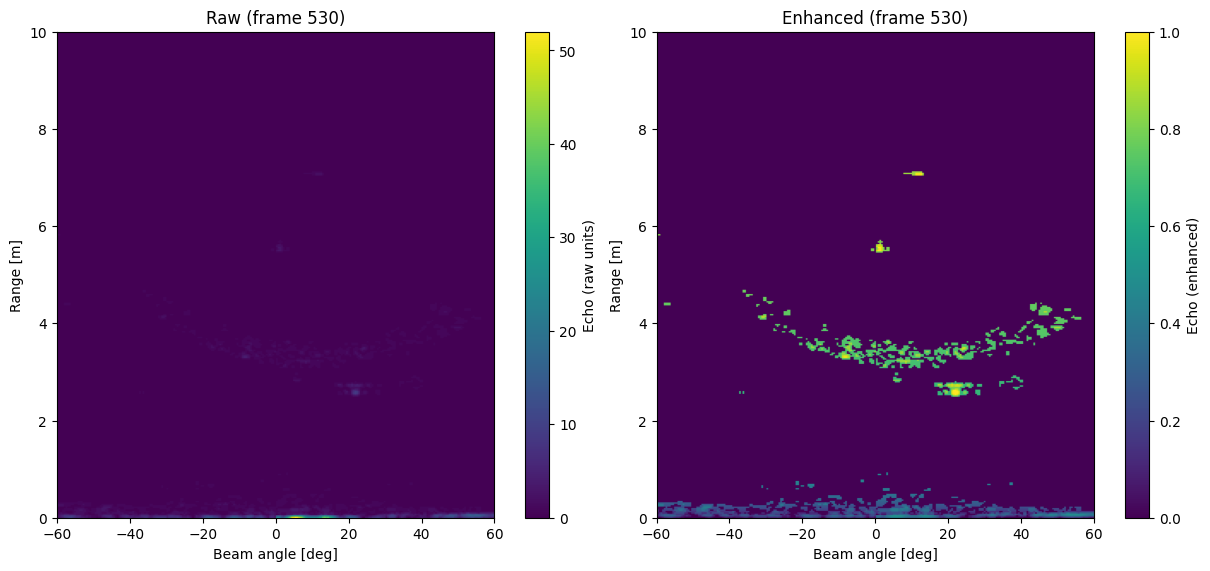

✅ Frame data loaded and ready for cone visualization


In [3]:
# === Raw and Enhanced Intensity Display ===
import matplotlib.pyplot as plt

# Load data and extract frame
df = viz.load_sonar_data(DATA_FILE)
frame_data = viz.get_frame_data(df, FRAME_INDEX)

print(f"📊 Frame {FRAME_INDEX} shape: {frame_data.shape}")
print(f"📈 Data range: {frame_data.min():.3f} to {frame_data.max():.3f}")

# Create side-by-side visualization
fig = viz.plot_raw_and_enhanced(frame_data, FRAME_INDEX)
plt.show()

# Store data for cone view
current_frame_data = frame_data
print("✅ Frame data loaded and ready for cone visualization")

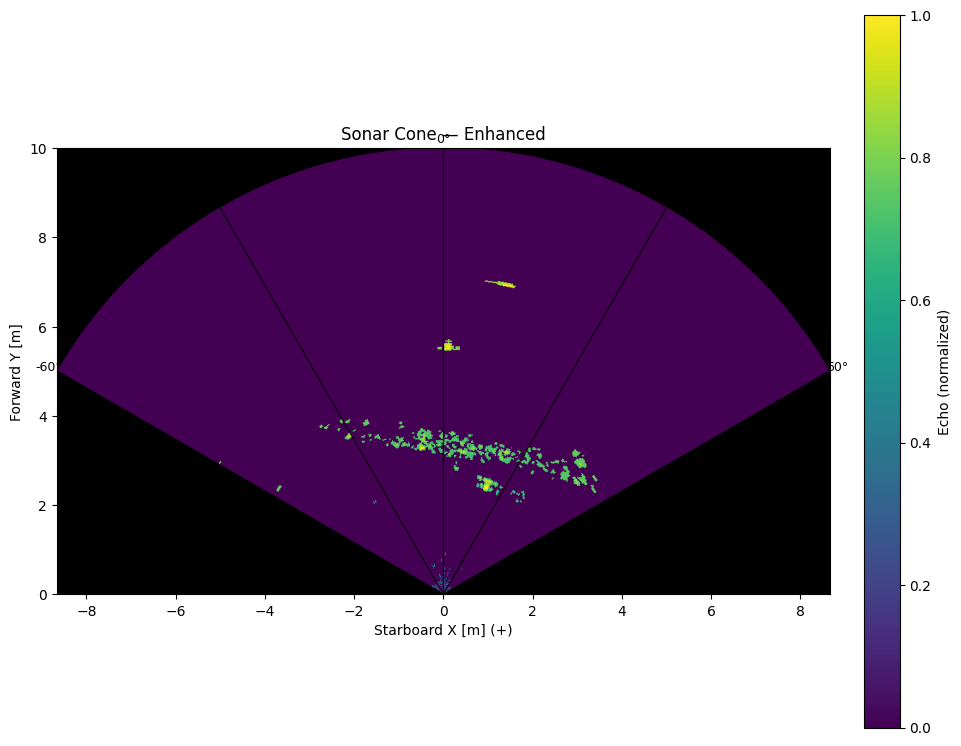

✅ Cone view displayed
💡 The cone shows the sonar data mapped to real-world coordinates
   - X-axis: Starboard direction (positive to the right)
   - Y-axis: Forward direction
   - Black lines: Beam angle references
   - Black areas: Outside the sonar's field of view


In [4]:
# === Geometric Cone View ===
import matplotlib.pyplot as plt

# Create cone visualization (using enhanced data by default)
fig = viz.plot_cone_view(current_frame_data, use_enhanced=True)
plt.show()

print("✅ Cone view displayed")
print("💡 The cone shows the sonar data mapped to real-world coordinates")
print("   - X-axis: Starboard direction (positive to the right)")  
print("   - Y-axis: Forward direction")
print("   - Black lines: Beam angle references")
print("   - Black areas: Outside the sonar's field of view")

In [5]:
# === Frame Statistics and Analysis ===
from utils.sonar_visualization import analyze_bag_directly

# Analyze the specific frame we're visualizing
BAG_PATH = "data/2024-08-20_13-39-34_video.bag"  # Adjust path as needed
TOPIC = "/sensor/sonoptix_echo/image"

print(f"🔍 Analyzing frame {FRAME_INDEX} from bag file...")

try:
    # Direct bag analysis
    stats = analyze_bag_directly(BAG_PATH, TOPIC, FRAME_INDEX)
    
    print("📊 Frame Analysis Results:")
    print(f"   Data type: {stats['dtype']}")
    print(f"   Array shape: {stats['shape']}")
    print(f"   Value range: {stats['min_max'][0]:.3f} to {stats['min_max'][1]:.3f}")
    print(f"   Max fractional part: {stats['max_fractional_part']:.6f}")
    print(f"   Unique values: {stats['unique_count']}")
    print(f"   First 10 unique values: {stats['first_50_unique'][:10]}")
    
    # Also get statistics from our processed frame
    frame_stats = viz.analyze_frame_statistics(df, FRAME_INDEX)
    print(f"\n📈 Processed Frame Statistics:")
    print(f"   Non-zero ratio: {frame_stats['nonzero_ratio']:.1%}")
    print(f"   Mean intensity: {frame_stats['mean_value']:.3f}")
    print(f"   Standard deviation: {frame_stats['std_value']:.3f}")
    
except FileNotFoundError:
    print(f"⚠️  Bag file not found: {BAG_PATH}")
    print("   Update BAG_PATH to point to your actual bag file")
except Exception as e:
    print(f"❌ Error analyzing bag: {e}")
    
    # Fallback to CSV analysis only
    frame_stats = viz.analyze_frame_statistics(df, FRAME_INDEX)
    print(f"\n📈 CSV Frame Statistics:")
    for key, value in frame_stats.items():
        if isinstance(value, float):
            if 'ratio' in key or 'percent' in key:
                print(f"   {key}: {value:.1%}")
            else:
                print(f"   {key}: {value:.3f}")
        else:
            print(f"   {key}: {value}")

🔍 Analyzing frame 530 from bag file...
📊 Frame Analysis Results:
   Data type: float32
   Array shape: (262144,)
   Value range: 0.000 to 52.000
   Max fractional part: 0.000000
   Unique values: 42
   First 10 unique values: [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0]

📈 Processed Frame Statistics:
   Non-zero ratio: 1.4%
   Mean intensity: 0.034
   Standard deviation: 0.570
